In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#statistic
from scipy import stats

#encoder

import warnings 
warnings.filterwarnings("ignore")

In [3]:
from mylibrary.get_data import ambilcsv

In [4]:
ambilcsv()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0


In [5]:
df = ambilcsv().copy()

In [6]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0


In [9]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [50]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,year,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,2015,2,18


In [35]:

df_meanyear = df.groupby('year').mean()
df_meanyear1 = df_meanyear.reset_index()
df_meanyear1

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,2014,539181.428415,3.377161,2.128904,2098.319073,14950.534272,1.502631,0.007791,0.233582,3.429919,7.681542,1802.015240,296.303834,1970.933985,90.978883
1,2015,541988.992264,3.357593,2.085100,2041.285100,15434.917192,1.476862,0.007020,0.235817,3.366476,7.605158,1759.827937,281.457163,1971.154298,70.614900


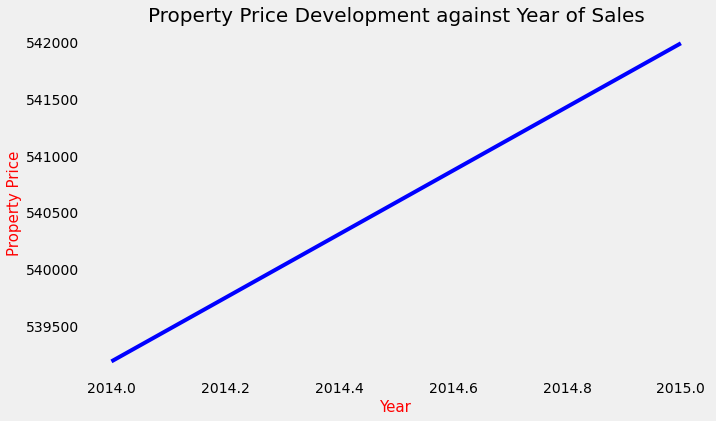

In [40]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 6))

x = df_meanyear1['year']
y = df_meanyear1['price'] 

plt.plot(x, y, 'blue')
plt.title('Property Price Development against Year of Sales',color='k', size=20)
plt.xlabel('Year',color='r', size=15) 
plt.ylabel('Property Price',color='r', size=15) 
plt.grid();

Grafik diatas menunjukan perkembangan harga penjualan rumah yang dimulai pada 02 Mei 2014 dan berakhir pada 27 Mei 2015 mengalami peningkatan yang signifikan

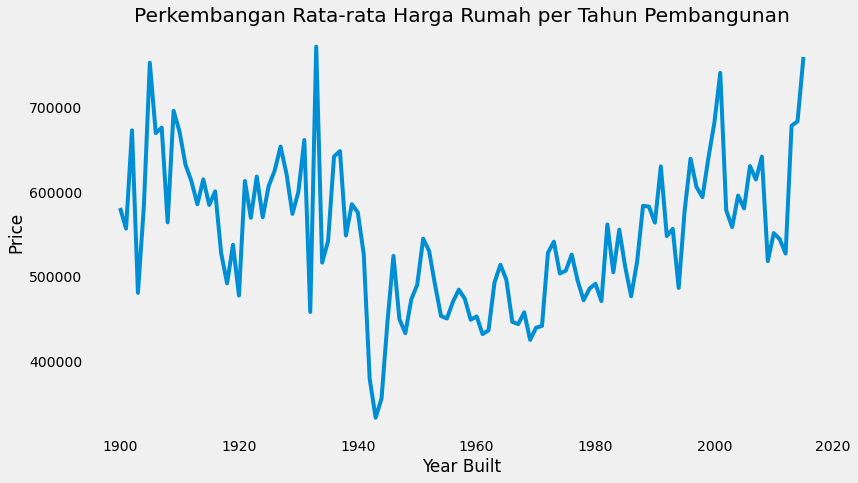

In [44]:
years = [year for year, df in df.groupby('yr_built')]
prices = df.groupby('yr_built').mean()['price']

plt.figure(figsize=(12,7))

plt.plot(years, prices)
plt.title('Perkembangan Rata-rata Harga Rumah per Tahun Pembangunan')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.grid()

plt.show()


By 1940 the amount of money spent on home building and/or construction (and/or home buying) in the late 1930s had surpassed the half a million dollar mark for the Lima area. This was most likely a result of the Federal Housing Administration (F.H.A.) involvement that started in the year 1934, and inflating cost of materials needed to build these homes.

Pada tahun 1940-an Amerika mengalami krisi keungan yang cukup parah pasca dimulainya perang dunia ke-2, Pemerintah mengeluarkan biaya yang cukup banyak hingga jutaan dolar tak terkecuali untuk pembangunan perumahan.Dari grafik diatas menunjukan bahwa rumah yang dibangun pada 1940-an memiliki harga yang sangat rendah.

In [56]:
df_2014 = df[df['year']==2014].groupby(by="month").mean().reset_index()
df_2014

,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,year,day
0,5,548080.276584,3.389706,2.139847,2114.912896,15959.428167,1.493495,0.005656,0.247738,3.436086,7.724548,1797.126131,317.786765,1970.536765,118.639706,2014.0,16.722851
1,6,558002.199541,3.418349,2.163876,2132.820642,14260.094954,1.513303,0.008716,0.241743,3.460092,7.738532,1822.365138,310.455505,1970.741284,80.543119,2014.0,16.024312
2,7,544788.764360,3.391678,2.146540,2128.246495,13857.654907,1.522162,0.006784,0.221167,3.442786,7.716870,1841.531886,286.714609,1971.777024,92.125283,2014.0,16.375848
3,8,536445.276804,3.355670,2.123067,2084.762887,14636.380928,1.500258,0.006186,0.223196,3.440206,7.685567,1798.204639,286.558247,1972.058247,78.193814,2014.0,15.947938
4,9,529253.821871,3.360203,2.130919,2077.375986,15367.856257,1.490981,0.008455,0.248591,3.430665,7.640361,1785.519166,291.856821,1970.535513,99.047914,2014.0,15.612740
5,10,539026.971778,3.360490,2.118876,2083.896166,15489.720980,1.502929,0.008520,0.244409,3.411076,7.640043,1787.299255,296.596912,1970.119808,94.473376,2014.0,16.514377
6,11,521961.009213,3.333806,2.079376,2048.768958,15258.856130,1.500709,0.010631,0.221120,3.401843,7.610914,1775.916371,272.852587,1970.090716,87.574061,2014.0,14.138909
7,12,524461.866757,3.390891,2.102991,2091.339225,15330.740313,1.487084,0.008158,0.216859,3.394969,7.657376,1787.078858,304.260367,1971.276003,77.410605,2014.0,13.454793


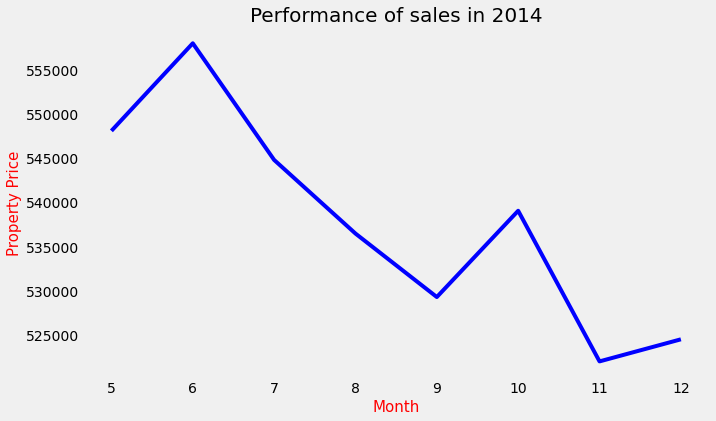

In [63]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 6))

x = df_2014['month']
y = df_2014['price'] 

plt.plot(x, y, 'blue')
plt.title('Performance of sales in 2014',color='k', size=20)
plt.xlabel('Month',color='r', size=15) 
plt.ylabel('Property Price',color='r', size=15) 
plt.grid();

In [61]:
df_2015 = df[df['year']==2015].groupby(by="month").mean().reset_index()
df_2015

,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,year,day
0,1,525870.889571,3.387526,2.129346,2085.094070,17869.721881,1.478528,0.008180,0.246421,3.347648,7.642127,1814.019427,271.074642,1971.749489,73.433538,2015.0,16.801636
1,2,507851.371200,3.340000,2.059600,2010.974400,13703.131200,1.467600,0.004800,0.243200,3.404800,7.554400,1726.692800,284.281600,1971.464000,51.055200,2015.0,15.787200
2,3,543977.187200,3.367467,2.065333,2021.968533,15604.088533,1.464267,0.006933,0.238933,3.355733,7.588267,1740.604800,281.363733,1970.597333,82.976533,2015.0,17.146133
3,4,561837.774989,3.364859,2.106006,2060.377409,14265.989691,1.495069,0.008516,0.230390,3.359032,7.651277,1777.770955,282.606455,1971.713133,70.670551,2015.0,16.346481
4,5,558126.811146,3.292570,2.052632,2023.741486,18645.713622,1.465944,0.004644,0.215170,3.377709,7.537152,1735.729102,288.012384,1969.340557,68.123839,2015.0,6.481424


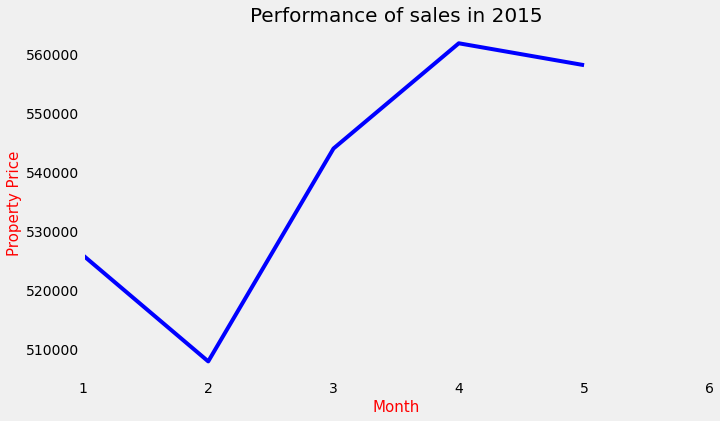

In [68]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 6))

x = df_2015['month']
y = df_2015['price'] 

plt.plot(x, y, 'blue')
plt.title('Performance of sales in 2015',color='k', size=20)
plt.xlim(1,6)
plt.xlabel('Month',color='r', size=15) 
plt.ylabel('Property Price',color='r', size=15) 
plt.grid();

In [119]:
top_price_house_by_builtyear= df.groupby(by="yr_built").count().sort_values('sqft_lot',ascending=False).reset_index().head(10)
top_price_house_by_builtyear

,yr_built,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,year
0,2014,559,559,559,559,559,559,559,559,559,559,559,559,559,559,559
1,2006,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454
2,2005,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450
3,2004,433,433,433,433,433,433,433,433,433,433,433,433,433,433,433
4,2003,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422
5,1977,417,417,417,417,417,417,417,417,417,417,417,417,417,417,417
6,2007,417,417,417,417,417,417,417,417,417,417,417,417,417,417,417
7,1978,387,387,387,387,387,387,387,387,387,387,387,387,387,387,387
8,1968,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381
9,2008,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367


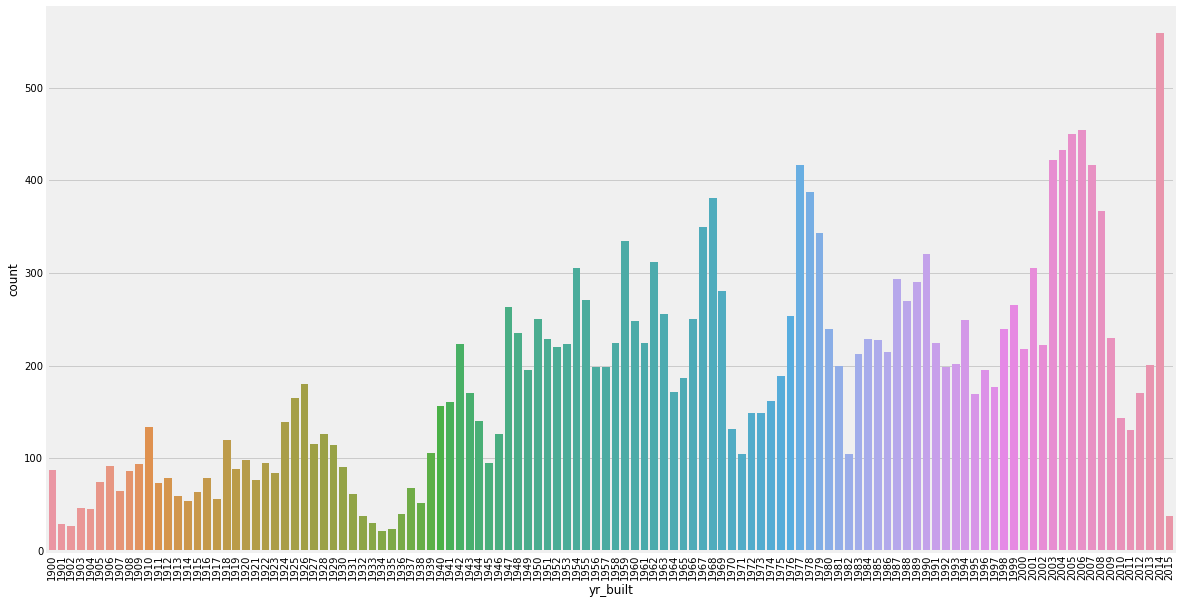

In [123]:
plt.figure(figsize=(18,10))
sns.countplot(df['yr_built'])
plt.xticks(rotation=90);

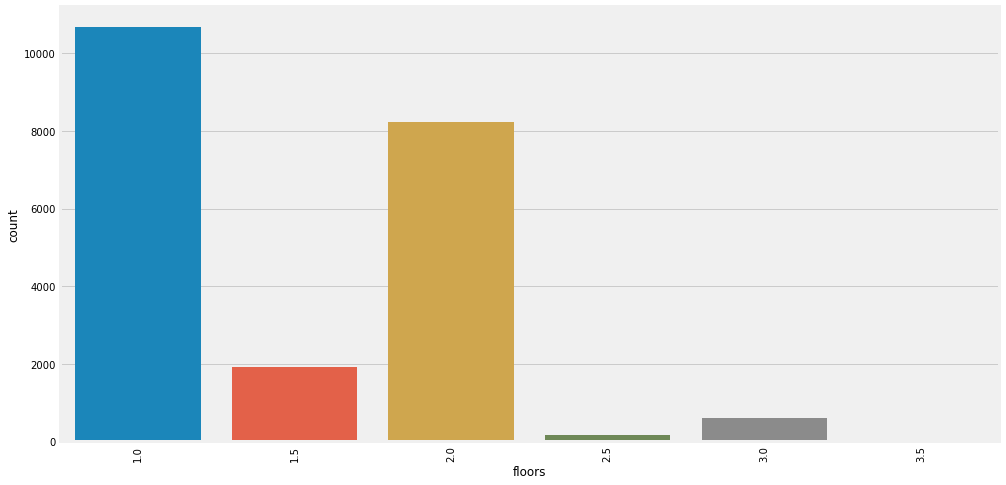

In [71]:
plt.figure(figsize=(15,8))
sns.countplot(df['floors'])
plt.xticks(rotation=90);

Penjualan rumah terbanyak dengan tipe rumah yang memiliki 1 lantai dan yang paling sedikit diminati yaitu dengan tipe ruma 3 lantai dan memiliki satu loteng

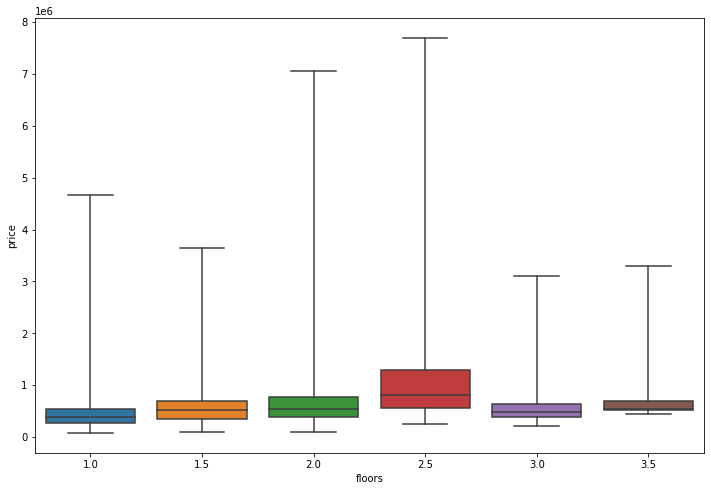

In [17]:

plt.figure(figsize=(12,8))
sns.boxplot(x='floors',y="price" ,data=df,whis=(0,100));

Untuk variasi harga tipe rumah yang memiliki variasi beragam yaitu tipe rumah dengan jenis 2 lantai dan satu loteng

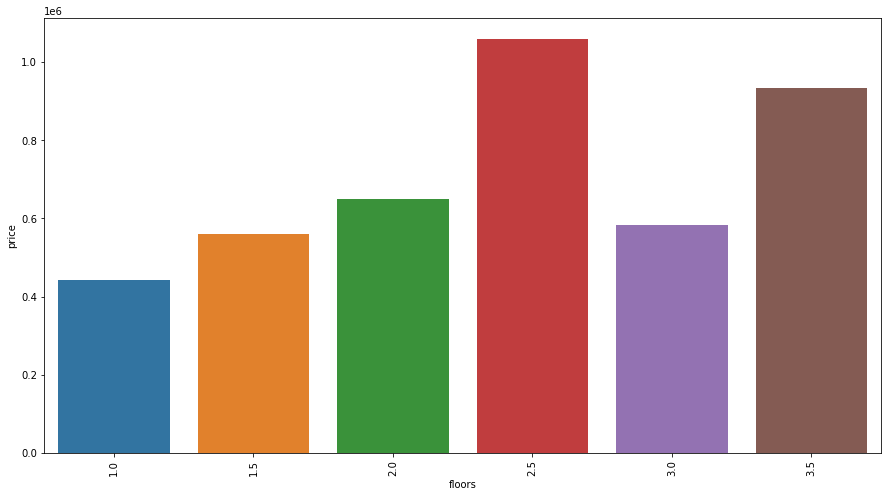

In [11]:
plt.figure(figsize=(15,8))
sns.barplot(x="floors",y="price",data=df,ci=None)
plt.xticks(rotation=90);

Rumah dengan tipe 1 lantai memiliki harga yang paling murah diantara tipe yang lain, hal ini mungkin yang menjadi alasan mengapa rumah dengan jenis 1 lantai sangat diminati oleh pembeli.

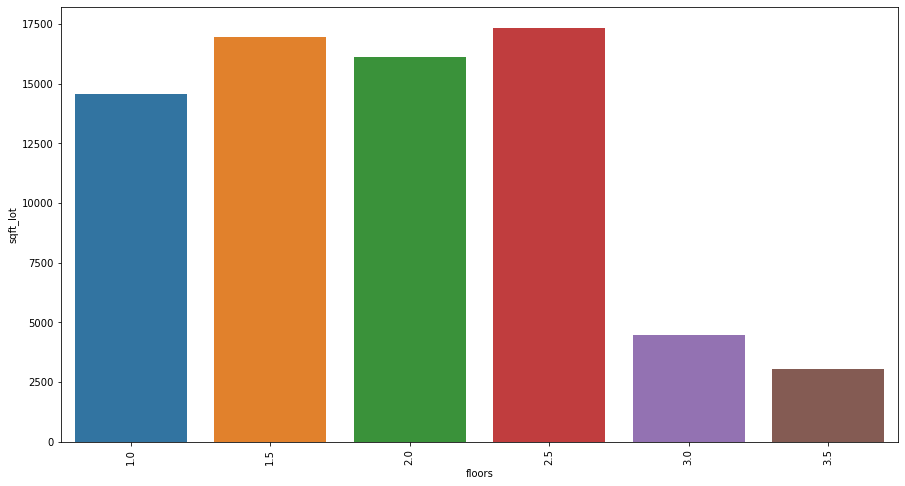

In [12]:
plt.figure(figsize=(15,8))
sns.barplot(x="floors",y="sqft_lot",data=df,ci=None)
plt.xticks(rotation=90);

Rumah dengan tipe ``2 lantai dan 1 loteng`` adalah jenis rumah yang memiliki ``rata-rata luas yang paling tinggi`` dan untuk jenis rumah dengan tipe ``1 lantai`` berada pada peringkat ke empat, hal tersebut bisa menjadi salah pengaruh mengapa jenis rumah dengan 1 lantai sangat diminati oleh pembeli, disamping rata-rata harga paling murah ternyata rumah dengan jenis 1 lantai memiliki luas tanah yang cukup luas

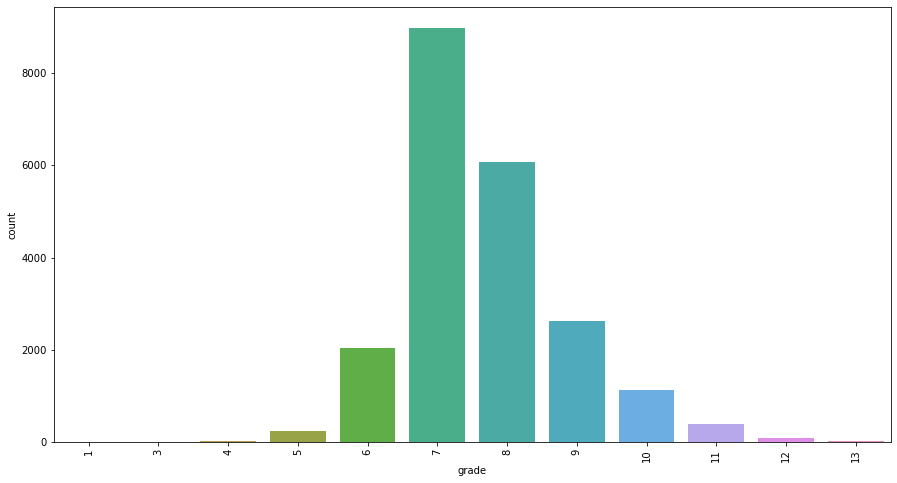

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(df['grade'])
plt.xticks(rotation=90);

Untuk penjualan ``terbanyak`` bedasarkan tipe grade rumah yaitu tipe rumah yang memiliki ``grade 7`` 

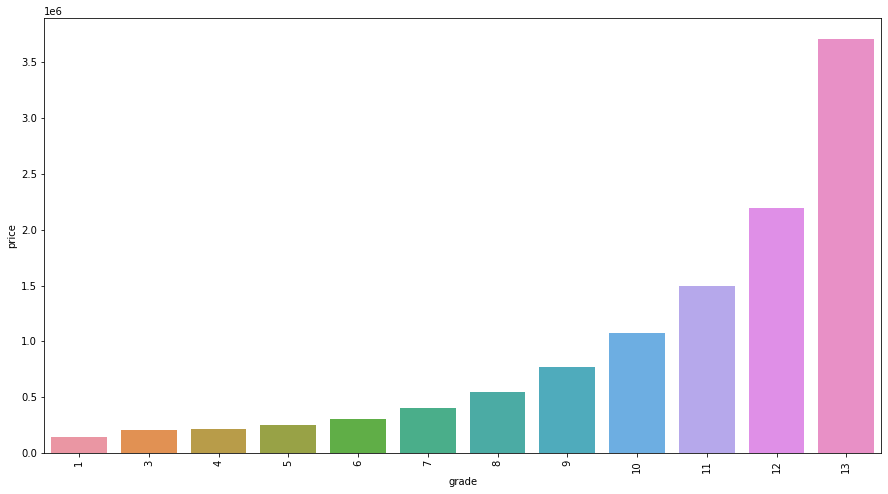

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(x="grade",y="price",data=df,ci=None)
plt.xticks(rotation=90);

Rumah dengan tipe grade 7 memiliki rata-rata yang cukup murah dibandingkan dengan tipe rumah diatas grade 7. Kesimpulan yang bisa diambil adalah semakin besar tingkat grade maka semakin mahal harga bangunan rumah.

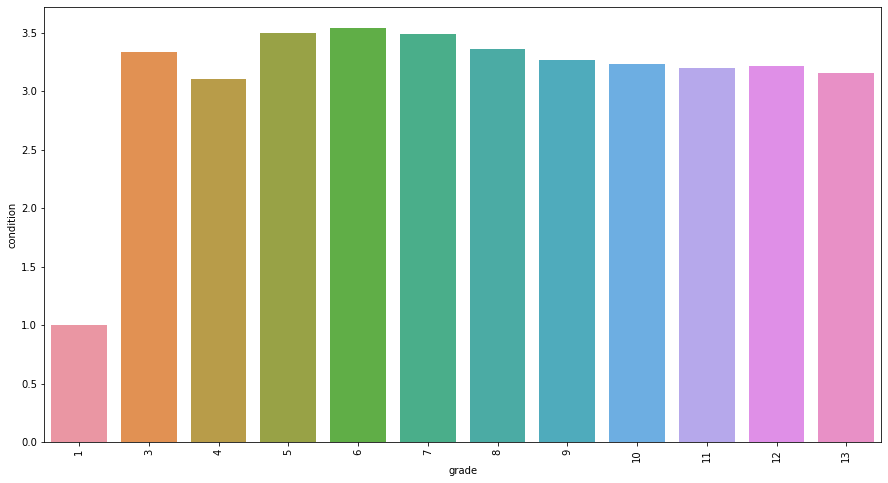

In [14]:
plt.figure(figsize=(15,8))
sns.barplot(x="grade",y="condition",data=df,ci=None)
plt.xticks(rotation=90);

rumah dengan tipe grade 6 memiliki peringkat paling atas dalam penilaian kondisi rumah.Grade 7 memiliki peringkat ke 3. Kesimpulan yang bisa dilihat pada diagram diatas besaran grade tidak berpengaruh dengan kondisi sebuah rumah

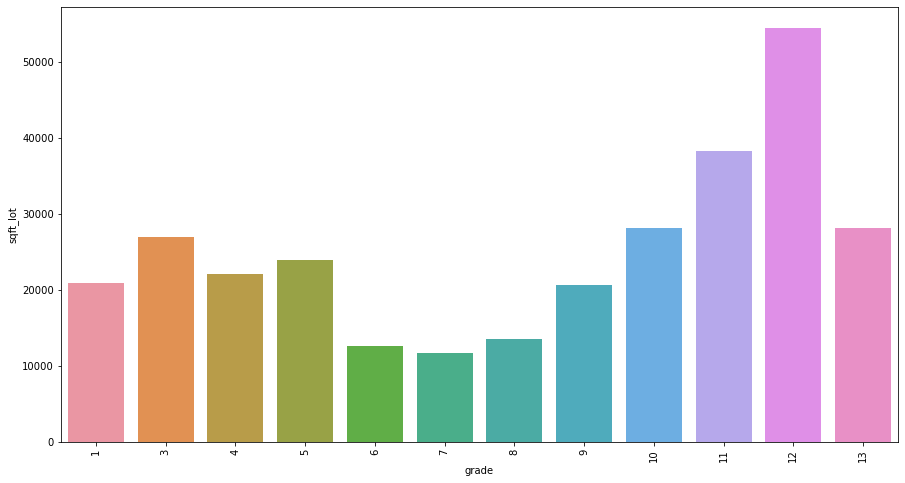

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x="grade",y="sqft_lot",data=df,ci=None)
plt.xticks(rotation=90);

In [43]:
df_top_floor = df.groupby(by="grade").mean().sort_values("sqft_lot",ascending=False).reset_index()
df_top_floor

,grade,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year
0,12,2.191222e+06,4.222222,3.980556,5471.588889,54521.311111,1.950000,0.122222,1.622222,3.211111,4649.300000,822.288889,1992.377778,66.488889,2014.366667
1,11,1.496842e+06,4.160401,3.501880,4395.448622,38372.789474,1.961153,0.050125,1.030075,3.195489,3853.182957,542.265664,1992.145363,75.080201,2014.298246
2,13,3.709615e+06,4.846154,5.096154,7483.076923,28204.769231,1.961538,0.000000,1.846154,3.153846,6060.769231,1422.307692,1976.615385,460.923077,2014.230769
3,10,1.071771e+06,3.907407,3.006393,3520.299824,28191.063492,1.892857,0.024691,0.654321,3.232804,3112.086420,408.213404,1989.569665,88.225750,2014.291005
4,3,2.056667e+05,1.000000,0.250000,596.666667,26953.000000,1.000000,0.000000,0.000000,3.333333,596.666667,0.000000,1945.333333,0.000000,2014.666667
5,5,2.485240e+05,2.388430,1.113636,983.326446,24019.909091,1.086777,0.016529,0.136364,3.491736,944.607438,38.719008,1935.454545,49.318182,2014.363636
6,4,2.143810e+05,1.482759,0.905172,660.482759,22101.482759,1.034483,0.000000,0.137931,3.103448,653.586207,6.896552,1939.137931,68.275862,2014.344828
7,1,1.420000e+05,0.000000,0.000000,290.000000,20875.000000,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,1963.000000,0.000000,2014.000000
8,9,7.735132e+05,3.773231,2.664340,2868.139962,20638.515488,1.849140,0.009560,0.429446,3.266157,2554.395411,313.744551,1988.419120,105.624092,2014.300956
9,8,5.428528e+05,3.479895,2.348179,2184.748517,13510.186552,1.668177,0.006592,0.246539,3.355471,1867.411668,317.336849,1980.400461,87.293013,2014.317897


In [35]:
df[df['grade']==7]['condition'].mean()

3.491259325242178